In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# Sheet 4
## 4.2 FritzHugh-Nagumo Model
The model is defined as follows:
$$\dot v = v - \frac{1}{3}v^3 - w + I \\ \dot w = \frac{v}{\tau} - \frac{a}{\tau} - \frac{bw}{\tau}$$

In [12]:
# define the model
def derivative(v, w, a, b, I, tau):
    vdot = v - (1/3) * v**3 - w + I
    wdot = v / tau - a / tau - b * w

    return vdot, wdot

v = np.linspace(1,5,10)
w = np.linspace(-1, -5 , 10)
params = 1, 1, 1, 1000

vw = np.array((v, w))

np.array(derivative(*vw , *params)).shape

(2, 10)

In [13]:
def solve(T, v0, w0, a, b, I, tau):
    params = a, b, I, tau
    return solve_ivp(lambda t, y: np.array(derivative(*y, *params)), (0, T), (v0, w0))

In [55]:
def plot_flow(xlim, ylim, density, a, b, I, tau, normalize = True):
    # generate the grid upon which dx_dt will be computed
    xy = np.meshgrid(np.linspace(*xlim, density), np.linspace(*ylim, density))
    xy = np.array(xy).reshape(2,density**2)

    # calculate the flow at each grid point
    uv = np.array([derivative(*point, a, b, I, tau) for point in xy.T]).T

    if normalize:
        uv = uv / np.linalg.norm(uv, axis = 0)


    plt.figure(figsize = (6, 6))

    plt.quiver(*xy, *uv, label = 'flow')

In [56]:
def plot_trajectory(y0, a, b, I, tau):
    solution = solve(1000, *y0, a, b, I, tau)

    plt.plot(*solution.y, label = 'trajectory')


### 4.2.1
We now set $a=0$ and $b=0.5$, with this the model becomes:
$$\dot v = v - 1/3\ \ v^3 - w + I \\ \dot w = v / \tau - w / 2\tau$$
For the nullclines we set $\dot v = 0$ and $\dot w = 0$: <br>
For the v nullcline:
$$0 = v - 1/3\ \ v^3 - w + I \\ \dot w = v / \tau - w / 2\tau$$
$$\implies w = v - 1/3\ \ v^3 + I$$
For the w nullcline:
$$0 = v - 1/3\ \ v^3 - w + I \\ 0 = v / \tau - w / 2\tau$$
$$\implies v = w / 2$$
The fixed point is at $\dot w = \dot v = 0$:
$$0 = v - 1/3\ \ v^3 - w + I \\ 0 = v / \tau - w / 2\tau$$
The solution to this system is complex... I suspect I made a mistake at some point. <br>
Not having an analytical solution makes classifing the fixed point pretty difficult...

In [60]:
a, b, I, tau = 0, 0.5, 1, 1000

v_nullcline = lambda v: v - v**3 / 3 + I
w_nullcline = lambda w: w/2

def plot_nullclines():
    v = np.linspace(-6, 6, 100)
    w = np.linspace(-6, 6, 100)

    plt.plot(v, v_nullcline(v), label = 'v-nullcline')
    plt.plot(w_nullcline(w), w, label = 'w-nullcline')

(-5.1, 5.1)

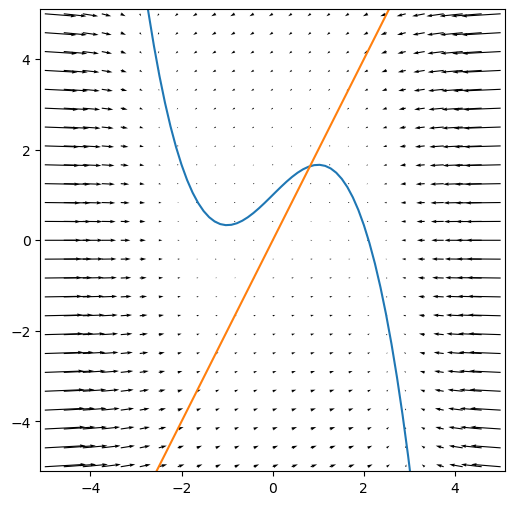

In [61]:
plot_flow((-5, 5), (-5, 5), 25, a, b, I, tau, False)

plot_nullclines()

plt.xlim(-5.1, 5.1)
plt.ylim(-5.1, 5.1)

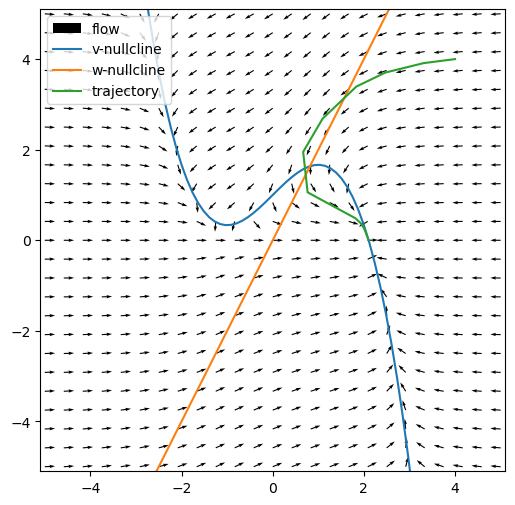

In [62]:
plot_flow((-5, 5), (-5, 5), 25, a, b, I, tau)

plot_nullclines()

plot_trajectory([4,4], a, b, I, tau)

plt.xlim(-5.1, 5.1)
plt.ylim(-5.1, 5.1)

plt.legend()